#Analisís exploratorio de datos del dataset final en el proyecto:
###Predicción de la Tasa de Ocupación Hotelera y de Plazas en Tierra del Fuego

##Exploración del dataset de Ushuaia

In [42]:
import pandas as pd

df = pd.read_csv('USH_completo_renombrado.csv')
print(df.head())

   anio  temp_max  temp_min  temp_media  lluvia_mm  dias_nieve   toh   top  \
0  2009      10.8       9.4        10.1       30.8           0  66.1  56.0   
1  2009       9.5       8.3         8.9       29.0           0  54.5  45.0   
2  2009       9.1       7.9         8.5       64.6           1  39.2  30.7   
3  2009       6.1       5.2         5.7       86.2           1  31.5  24.3   
4  2009       4.7       2.0         2.6       59.2           4  22.1  16.5   

   ent_san_sebastian  aero_ush  ...  mes_diciembre  mes_enero  mes_febrero  \
0              26309   33589.0  ...          False       True        False   
1              15123   31671.0  ...          False      False         True   
2              14684   20569.0  ...          False      False        False   
3              13319   15312.0  ...          False      False        False   
4              12729    9878.0  ...          False      False        False   

   mes_julio  mes_junio  mes_marzo  mes_mayo  mes_noviembre  m

In [43]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   anio               168 non-null    int64  
 1   temp_max           168 non-null    float64
 2   temp_min           168 non-null    float64
 3   temp_media         168 non-null    float64
 4   lluvia_mm          168 non-null    float64
 5   dias_nieve         168 non-null    int64  
 6   toh                166 non-null    float64
 7   top                166 non-null    float64
 8   ent_san_sebastian  168 non-null    int64  
 9   aero_ush           166 non-null    float64
 10  aero_rg            168 non-null    int64  
 11  mes_abril          168 non-null    bool   
 12  mes_agosto         168 non-null    bool   
 13  mes_diciembre      168 non-null    bool   
 14  mes_enero          168 non-null    bool   
 15  mes_febrero        168 non-null    bool   
 16  mes_julio          168 non

In [44]:
print("\nDistribución de valores en columnas categóricas:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())

print("\nDistribución de valores en columnas numéricas:")
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(bins=10).sort_index()) # Usamos bins para ver la distribución en intervalos

print("\nAnálisis de correlación entre columnas numéricas:")
# Excluimos columnas con muchos valores únicos si es necesario
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)


Distribución de valores en columnas categóricas:

Distribución de valores en columnas numéricas:

Columna: anio
(2008.986, 2010.3]    24
(2010.3, 2011.6]      12
(2011.6, 2012.9]      12
(2012.9, 2014.2]      24
(2014.2, 2015.5]      12
(2015.5, 2016.8]      12
(2016.8, 2018.1]      24
(2018.1, 2019.4]      12
(2019.4, 2020.7]      12
(2020.7, 2022.0]      24
Name: count, dtype: int64

Columna: temp_max
(0.783, 2.37]      9
(2.37, 3.94]      14
(3.94, 5.51]      21
(5.51, 7.08]      19
(7.08, 8.65]      30
(8.65, 10.22]     18
(10.22, 11.79]    13
(11.79, 13.36]    10
(13.36, 14.93]    22
(14.93, 16.5]     12
Name: count, dtype: int64

Columna: temp_min
(-2.715, -1.27]     3
(-1.27, 0.16]      12
(0.16, 1.59]       24
(1.59, 3.02]       31
(3.02, 4.45]       25
(4.45, 5.88]       32
(5.88, 7.31]       20
(7.31, 8.74]       13
(8.74, 10.17]       7
(10.17, 11.6]       1
Name: count, dtype: int64

Columna: temp_media
(-0.012199999999999999, 1.12]     5
(1.12, 2.24]                     1

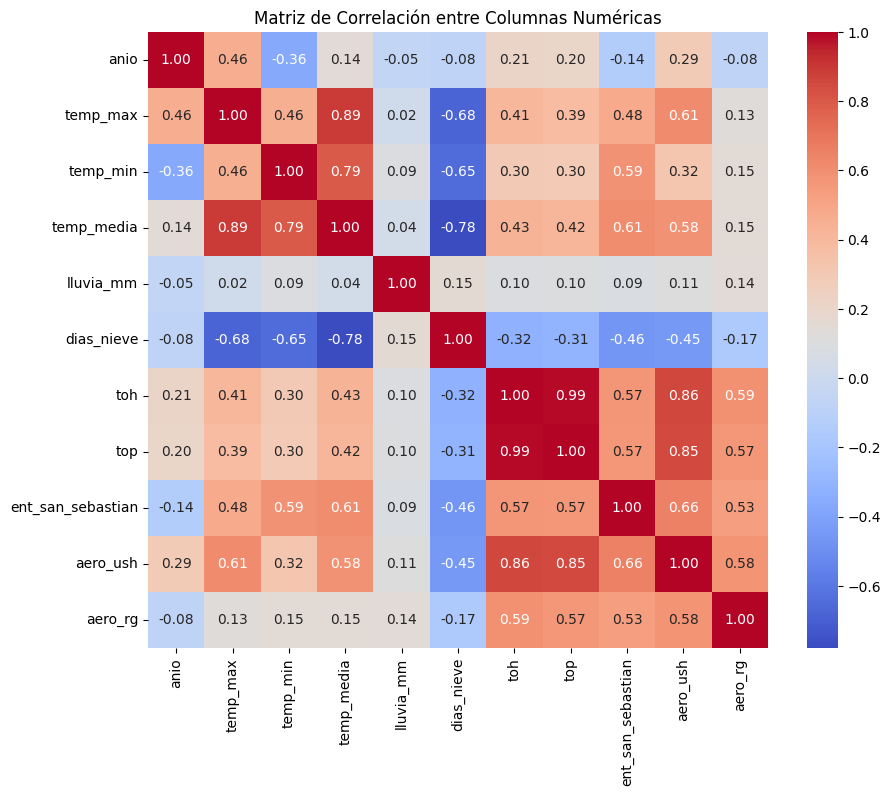


Identificación de posibles valores atípicos (outliers) usando describe():

Identificación de filas duplicadas:
Número total de filas duplicadas: 0


In [45]:
# Si quieres visualizar la correlación (requiere matplotlib y seaborn)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Columnas Numéricas')
plt.show()

print("\nIdentificación de posibles valores atípicos (outliers) usando describe():")

print("\nIdentificación de filas duplicadas:")
print(f"Número total de filas duplicadas: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("\nPrimeras 5 filas duplicadas:")
    print(df[df.duplicated()].head())

In [46]:
print("\nConteo de valores únicos y principales categorías en columnas categóricas:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumna: {col}")
    print(f"Número de valores únicos: {df[col].nunique()}")
    if df[col].nunique() > 20: # Mostrar solo las top N si hay muchas categorías
        print("Top 10 categorías:")
        print(df[col].value_counts().head(10))
    else:
         print("Distribución de categorías:")
         print(df[col].value_counts())

print("\nAnálisis de la memoria utilizada por el DataFrame:")
print(df.info(memory_usage='deep'))


Conteo de valores únicos y principales categorías en columnas categóricas:

Análisis de la memoria utilizada por el DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   anio               168 non-null    int64  
 1   temp_max           168 non-null    float64
 2   temp_min           168 non-null    float64
 3   temp_media         168 non-null    float64
 4   lluvia_mm          168 non-null    float64
 5   dias_nieve         168 non-null    int64  
 6   toh                166 non-null    float64
 7   top                166 non-null    float64
 8   ent_san_sebastian  168 non-null    int64  
 9   aero_ush           166 non-null    float64
 10  aero_rg            168 non-null    int64  
 11  mes_abril          168 non-null    bool   
 12  mes_agosto         168 non-null    bool   
 13  mes_diciembre      168 non-null    bool   

##Ahora Río Grande

In [47]:
df = pd.read_csv('RG_completo_renombrado.csv')
print(df.head())

   Anio  temp_max  temp_min  temp_media  lluvia_mm  dias_nieve        toh  \
0  2009      16.5       6.2        11.3       13.7           0  53.052414   
1  2009      16.0       5.1        10.3       38.4           0  54.363991   
2  2009      13.9       4.3         8.9       20.7           0  49.851257   
3  2009       9.4       2.5         5.8       59.8           0  52.861046   
4  2009       6.3      -1.2         2.1       11.4           1  55.200863   

         top  ent_san_sebastian  aero_ush  ...  mes_diciembre  mes_enero  \
0  34.955265            35474.0   33589.0  ...          False       True   
1  36.912571            26952.0   31671.0  ...          False      False   
2  34.294098            19468.0   20569.0  ...          False      False   
3  36.611073            15952.0   15312.0  ...          False      False   
4  36.415657            10071.0    9878.0  ...          False      False   

   mes_febrero  mes_julio  mes_junio  mes_marzo  mes_mayo  mes_noviembre  \
0   

In [48]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anio               168 non-null    int64  
 1   temp_max           168 non-null    float64
 2   temp_min           168 non-null    float64
 3   temp_media         168 non-null    float64
 4   lluvia_mm          168 non-null    float64
 5   dias_nieve         168 non-null    int64  
 6   toh                168 non-null    float64
 7   top                168 non-null    float64
 8   ent_san_sebastian  168 non-null    float64
 9   aero_ush           166 non-null    float64
 10  aero_rg            168 non-null    int64  
 11  mes_abril          168 non-null    bool   
 12  mes_agosto         168 non-null    bool   
 13  mes_diciembre      168 non-null    bool   
 14  mes_enero          168 non-null    bool   
 15  mes_febrero        168 non-null    bool   
 16  mes_julio          168 non

In [49]:
print("\nDistribución de valores en columnas categóricas:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())

print("\nDistribución de valores en columnas numéricas:")
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(bins=10).sort_index()) # Usamos bins para ver la distribución en intervalos

print("\nAnálisis de correlación entre columnas numéricas:")
# Excluimos columnas con muchos valores únicos si es necesario
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)


Distribución de valores en columnas categóricas:

Distribución de valores en columnas numéricas:

Columna: Anio
(2008.986, 2010.3]    24
(2010.3, 2011.6]      12
(2011.6, 2012.9]      12
(2012.9, 2014.2]      24
(2014.2, 2015.5]      12
(2015.5, 2016.8]      12
(2016.8, 2018.1]      24
(2018.1, 2019.4]      12
(2019.4, 2020.7]      12
(2020.7, 2022.0]      24
Name: count, dtype: int64

Columna: temp_max
(0.882, 2.63]      2
(2.63, 4.36]      18
(4.36, 6.09]      18
(6.09, 7.82]      21
(7.82, 9.55]      13
(9.55, 11.28]     15
(11.28, 13.01]    18
(13.01, 14.74]    23
(14.74, 16.47]    29
(16.47, 18.2]     11
Name: count, dtype: int64

Columna: temp_min
(-7.817, -6.2]     2
(-6.2, -4.6]       2
(-4.6, -3.0]       6
(-3.0, -1.4]      17
(-1.4, 0.2]       33
(0.2, 1.8]        29
(1.8, 3.4]        17
(3.4, 5.0]        28
(5.0, 6.6]        32
(6.6, 8.2]         2
Name: count, dtype: int64

Columna: temp_media
(-2.717, -1.14]     1
(-1.14, 0.42]      12
(0.42, 1.98]       19
(1.98, 3.54]  

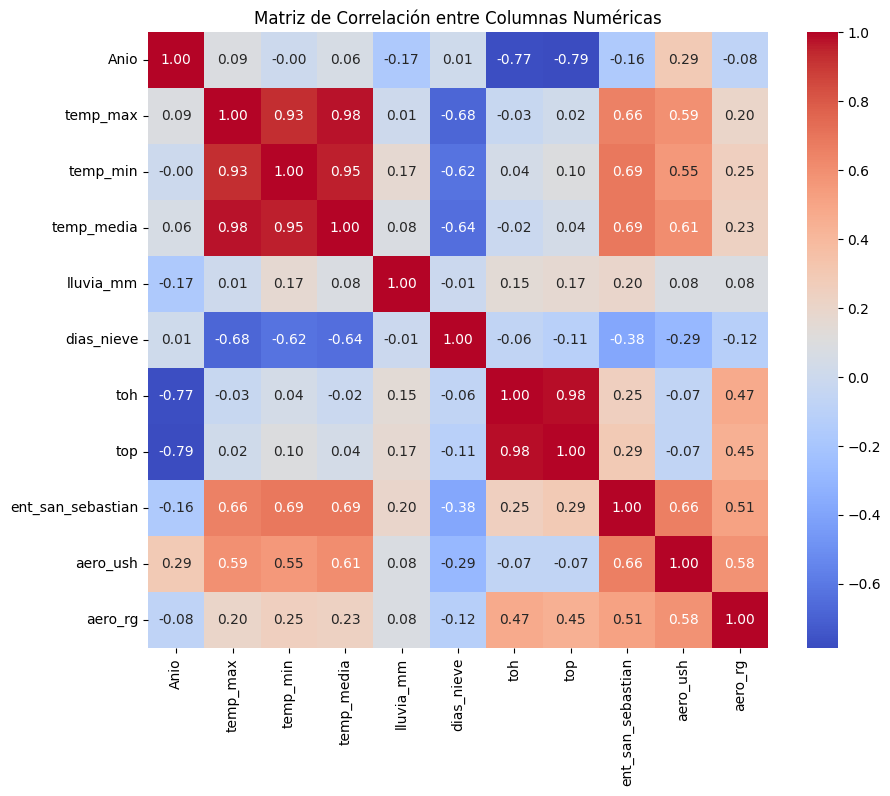


Identificación de posibles valores atípicos (outliers) usando describe():

Identificación de filas duplicadas:
Número total de filas duplicadas: 0


In [50]:
# Si quieres visualizar la correlación (requiere matplotlib y seaborn)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Columnas Numéricas')
plt.show()

print("\nIdentificación de posibles valores atípicos (outliers) usando describe():")

print("\nIdentificación de filas duplicadas:")
print(f"Número total de filas duplicadas: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("\nPrimeras 5 filas duplicadas:")
    print(df[df.duplicated()].head())

In [51]:
print("\nConteo de valores únicos y principales categorías en columnas categóricas:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumna: {col}")
    print(f"Número de valores únicos: {df[col].nunique()}")
    if df[col].nunique() > 20: # Mostrar solo las top N si hay muchas categorías
        print("Top 10 categorías:")
        print(df[col].value_counts().head(10))
    else:
         print("Distribución de categorías:")
         print(df[col].value_counts())

print("\nAnálisis de la memoria utilizada por el DataFrame:")
print(df.info(memory_usage='deep'))


Conteo de valores únicos y principales categorías en columnas categóricas:

Análisis de la memoria utilizada por el DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anio               168 non-null    int64  
 1   temp_max           168 non-null    float64
 2   temp_min           168 non-null    float64
 3   temp_media         168 non-null    float64
 4   lluvia_mm          168 non-null    float64
 5   dias_nieve         168 non-null    int64  
 6   toh                168 non-null    float64
 7   top                168 non-null    float64
 8   ent_san_sebastian  168 non-null    float64
 9   aero_ush           166 non-null    float64
 10  aero_rg            168 non-null    int64  
 11  mes_abril          168 non-null    bool   
 12  mes_agosto         168 non-null    bool   
 13  mes_diciembre      168 non-null    bool   